In [70]:
import pickle
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
with open('replies_clusters_with_sentiment_predictions.pickle', 'rb') as f:
    replies_clusters = pickle.load(f)
replies_clusters = replies_clusters[replies_clusters['toxic_tokens_empty'] == 0]
replies_clusters

,conversation_id,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,...,antivax_prediction,toxic_tokens_empty,antivax_tokens_empty,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu
6,1030000000000000,15628274,drbloem,Vaccination Dangers http://bit.ly/54oEjD #health,[],0,0,0,['#health'],"[{'user_id': '15628274', 'username': 'drbloem'}]",...,1,0,0,-0.4939,0.000,0.484,0.516,0.028811572,0.4891646,0.48202386
8,1030000000000000,88865710,reasonable_hank,Sharp end of vaccination | The Daily Telegraph...,['nocompulsoryvac'],0,0,0,"['#stopavn', '#vaxfax', '#1sol', '#vaccinetimes']","[{'user_id': '88865710', 'username': 'reasonab...",...,1,0,0,0.0000,0.000,1.000,0.000,0.05702623,0.4699053,0.47306848
7,1030000000000000,17887403,happysinger,The Sharp End of Vaccination: @nocompulsoryvac...,['nocompulsoryvac'],0,11,1,"['#stopavn', '#skeptics']","[{'user_id': '17887403', 'username': 'HappySin...",...,1,0,0,-0.3400,0.110,0.720,0.169,0.13702652,0.2561566,0.6068169
5,1120000000000000,79896423,constanthealth,Flu vaccination event raises more than $24K fo...,[],0,0,0,[],"[{'user_id': '79896423', 'username': 'constant...",...,0,0,0,0.1027,0.265,0.490,0.245,0.73023754,0.002765501,0.26699695
4,1180000000000000,67735456,superdave009,Flu vaccination programme for pregnant women u...,[],0,0,0,[],"[{'user_id': '67735456', 'username': 'SUPERDAV...",...,1,0,0,-0.3818,0.000,0.729,0.271,0.0473519,0.05607337,0.89657474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48602,1080000000000000000,47074030,lecterro,You are lying. I live in EU we have mandatory ...,"['sciarpuccio', 'thedarklander', 'customdeluxe...",2,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,1,0,0,-0.4767,0.044,0.842,0.114,0.06109702,0.5244051,0.41449788
48603,1080000000000000000,47074030,lecterro,You as declared leftist probably support depop...,"['sciarpuccio', 'thedarklander', 'customdeluxe...",0,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,1,0,0,0.3818,0.160,0.731,0.109,0.058457337,0.4945996,0.4469431
48605,1080000000000000000,47074030,lecterro,"No, it's not proven. Vaccination is just produ...","['sciarpuccio', 'customdeluxe79', 'thedarkland...",3,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,1,0,0,-0.2960,0.000,0.942,0.058,0.020158736,0.7437307,0.23611054
48609,1080000000000000000,861000000000000000,patriciamspenc2,He is the President that bailed out vaccinatio...,"['iamthewatchman3', 'craigrsawyer']",0,0,0,[],"[{'user_id': '860595938204819458', 'username':...",...,1,0,0,-0.7140,0.107,0.689,0.204,0.18173121,0.4833865,0.33488232


In [5]:
straw_man_predictions = pd.read_csv('straw_man_predictions.csv', lineterminator='\n', index_col=0)
adho_predictions = pd.read_csv('adho_predictions.csv', lineterminator='\n', index_col=0)
classifiers_predictions = straw_man_predictions.merge(adho_predictions[['text', 'predicted_label']],
                                                      on='text',
                                                      how='left')
classifiers_predictions = classifiers_predictions.rename(columns={'predicted_label_x': 'straw_man_pred',
                                                                  'predicted_label_y': 'ad_hom_pred',
                                                                  'text': 'tweet'})
replies_clusters = replies_clusters.merge(classifiers_predictions.drop(columns=['user_id'], axis=0),
                                          on='tweet',
                                          how='left')
replies_clusters = replies_clusters.dropna(subset=['straw_man_pred', 'ad_hom_pred'], axis=0)
replies_clusters['roberta_pos'] = replies_clusters['roberta_pos'].astype(np.float)
replies_clusters['roberta_neg'] = replies_clusters['roberta_neg'].astype(np.float)
replies_clusters['roberta_neu'] = replies_clusters['roberta_neu'].astype(np.float)
replies_clusters

,conversation_id,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,...,antivax_tokens_empty,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu,straw_man_pred,ad_hom_pred
0,1030000000000000,15628274,drbloem,Vaccination Dangers http://bit.ly/54oEjD #health,[],0,0,0,['#health'],"[{'user_id': '15628274', 'username': 'drbloem'}]",...,0,-0.4939,0.000,0.484,0.516,0.028812,0.489165,0.482024,0.0,1.0
1,1030000000000000,88865710,reasonable_hank,Sharp end of vaccination | The Daily Telegraph...,['nocompulsoryvac'],0,0,0,"['#stopavn', '#vaxfax', '#1sol', '#vaccinetimes']","[{'user_id': '88865710', 'username': 'reasonab...",...,0,0.0000,0.000,1.000,0.000,0.057026,0.469905,0.473068,1.0,1.0
2,1030000000000000,17887403,happysinger,The Sharp End of Vaccination: @nocompulsoryvac...,['nocompulsoryvac'],0,11,1,"['#stopavn', '#skeptics']","[{'user_id': '17887403', 'username': 'HappySin...",...,0,-0.3400,0.110,0.720,0.169,0.137027,0.256157,0.606817,1.0,1.0
3,1120000000000000,79896423,constanthealth,Flu vaccination event raises more than $24K fo...,[],0,0,0,[],"[{'user_id': '79896423', 'username': 'constant...",...,0,0.1027,0.265,0.490,0.245,0.730238,0.002766,0.266997,0.0,0.0
4,1180000000000000,67735456,superdave009,Flu vaccination programme for pregnant women u...,[],0,0,0,[],"[{'user_id': '67735456', 'username': 'SUPERDAV...",...,0,-0.3818,0.000,0.729,0.271,0.047352,0.056073,0.896575,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48453,1080000000000000000,47074030,lecterro,You are lying. I live in EU we have mandatory ...,"['sciarpuccio', 'thedarklander', 'customdeluxe...",2,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,0,-0.4767,0.044,0.842,0.114,0.061097,0.524405,0.414498,1.0,0.0
48454,1080000000000000000,47074030,lecterro,You as declared leftist probably support depop...,"['sciarpuccio', 'thedarklander', 'customdeluxe...",0,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,0,0.3818,0.160,0.731,0.109,0.058457,0.494600,0.446943,1.0,1.0
48455,1080000000000000000,47074030,lecterro,"No, it's not proven. Vaccination is just produ...","['sciarpuccio', 'customdeluxe79', 'thedarkland...",3,0,0,[],"[{'user_id': '47074030', 'username': 'lecterro...",...,0,-0.2960,0.000,0.942,0.058,0.020159,0.743731,0.236111,1.0,1.0
48456,1080000000000000000,861000000000000000,patriciamspenc2,He is the President that bailed out vaccinatio...,"['iamthewatchman3', 'craigrsawyer']",0,0,0,[],"[{'user_id': '860595938204819458', 'username':...",...,0,-0.7140,0.107,0.689,0.204,0.181731,0.483386,0.334882,1.0,0.0


In [6]:
def get_group_characteristic(df, group, column, func=np.mean):
    return df.groupby(group)[column].agg(func)

In [32]:
columns = ['toxic_prediction',
           'straw_man_pred',
           'ad_hom_pred',
           'vader_compound',
           'vader_pos',
           'vader_neu',
           'vader_neg',
           'roberta_pos',
           'roberta_neg',
           'roberta_neu']

users_characteristics = pd.DataFrame(columns=['user_id'])
users_characteristics['user_id'] = replies_clusters['user_id'].unique()

conv_characteristics = pd.DataFrame(columns=['conversation_id'])
conv_characteristics['conversation_id'] = replies_clusters['conversation_id'].unique()

# tweets_cluster_characteristics = pd.DataFrame(columns=['tweets_cluster'])
# tweets_cluster_characteristics['tweets_cluster'] = replies_clusters['tweets_cluster'].unique()

# cluster_characteristics = pd.DataFrame(columns=['cluster'])
# cluster_characteristics['cluster'] = replies_clusters['cluster'].unique()

# users_characteristics = users_characteristics.merge(replies_clusters.drop_duplicates(subset=['user_id'])
#                             [['user_id', 'cluster', 'tweets_cluster']], on='user_id', how='right')

for column in columns:
    users_characteristics = users_characteristics.merge(
                get_group_characteristic(replies_clusters, 'user_id', column),
                on='user_id',
                how='left'
            )

    conv_characteristics = conv_characteristics.merge(
                get_group_characteristic(replies_clusters, 'conversation_id', column),
                on='conversation_id',
                how='left'
            )
    # tweets_cluster_characteristics = tweets_cluster_characteristics.merge(
    #     get_group_characteristic(replies_clusters, 'tweets_cluster', column),
    #     on='tweets_cluster',
    #     how='left'
    # )
    # cluster_characteristics = cluster_characteristics.merge(
    #     get_group_characteristic(replies_clusters, 'cluster', column),
    #     on='cluster',
    #     how='left'
    # )

In [153]:
users_characteristics = pd.read_csv('users_characteristics.csv')
users_characteristics

,Unnamed: 0.1,Unnamed: 0,user_id,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,strongcompnum,indegree,outdegree,...,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu,X,Y,classifiers_cluster
0,0,0,15628274,0.0,0.000000,0.000000,0.000000,727.0,2.0,1.0,...,-0.017639,0.047179,0.892679,0.060179,0.062916,0.349714,0.587370,-0.756473,7.118280,0
1,1,1,88865710,8.0,0.260687,0.332915,60674.060606,889.0,23.0,42.0,...,-0.117335,0.069878,0.813653,0.116478,0.089039,0.531544,0.379417,-6.913095,26.089394,0
2,2,2,17887403,10.0,0.231493,0.282312,0.000000,894.0,1.0,3.0,...,-0.036775,0.077247,0.826247,0.096507,0.075588,0.492539,0.431873,-7.179299,22.322735,0
3,3,3,79896423,0.0,0.000000,0.000000,0.000000,87.0,2.0,1.0,...,-0.227838,0.067456,0.722222,0.210356,0.094183,0.280598,0.625219,24.977055,14.515505,0
4,4,4,67735456,0.0,0.000000,0.000000,0.000000,77.0,2.0,1.0,...,-0.298688,0.050412,0.679882,0.269765,0.064932,0.356135,0.578933,24.821575,15.302042,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1226,1226,35961145,0.0,0.000000,0.000000,0.000000,7056.0,1.0,0.0,...,0.421500,0.149000,0.851000,0.000000,0.798617,0.003008,0.198375,-25.952662,-7.315881,2
1227,1227,1227,16688755,0.0,0.000000,0.000000,0.000000,8465.0,1.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.046417,0.265413,0.688169,18.111570,-23.276886,1
1228,1228,1228,254909054,1.0,1.000000,1.000000,0.000000,56703.0,1.0,2.0,...,0.226667,0.097000,0.903000,0.000000,0.161675,0.027646,0.810679,4.662291,-27.862906,1
1229,1229,1229,273897097,0.0,0.000000,0.000000,0.000000,793.0,1.0,0.0,...,-0.950600,0.000000,0.502000,0.498000,0.010573,0.812164,0.177263,15.590939,20.232061,0


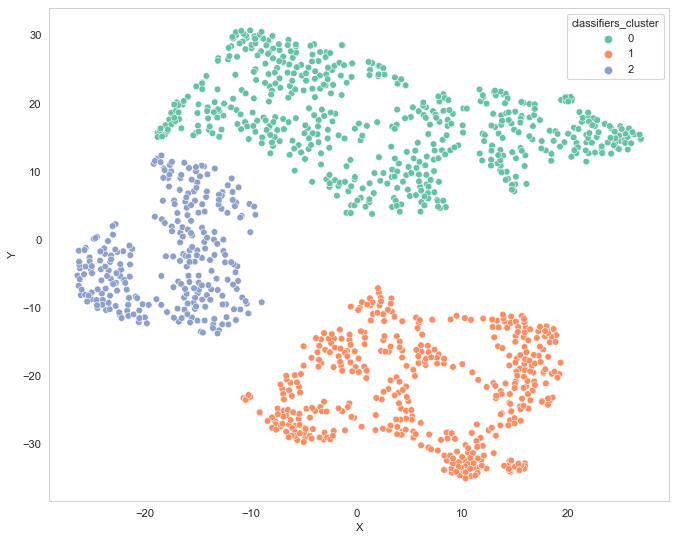

In [122]:
features = users_characteristics[[
           'toxic_prediction',
           'straw_man_pred',
           'ad_hom_pred',
           'vader_compound',
           'vader_pos',
           'vader_neu',
           'vader_neg',
           'roberta_pos',
           'roberta_neg',
           'roberta_neu',
           'X',
           'Y'
]]

tsne = TSNE(n_components=2, perplexity=5)
tsne.fit(features)
users_vectors = tsne.embedding_
users_characteristics['X'] = users_vectors[:, 0]
users_characteristics['Y'] = users_vectors[:, 1]

cluster_model = AgglomerativeClustering(n_clusters=3).fit(features)
users_characteristics['classifiers_cluster'] = cluster_model.labels_

figure(figsize=(10, 8), dpi=80)
# plt.scatter(users_vectors[:, 0], users_vectors[:, 1], c='r', s=2)

# users_characteristics = pd.read_csv('users_characteristics.csv')
sns.scatterplot(data=users_characteristics, x='X', y='Y', hue='classifiers_cluster', palette='Set2')
plt.grid(False)
plt.show()

In [174]:
users_characteristics[users_characteristics['classifiers_cluster'] == 0]['tweets_cluster'].value_counts()

0    315
2     76
1     74
5     35
4     24
3     14
Name: tweets_cluster, dtype: int64

In [167]:
users_characteristics[users_characteristics['classifiers_cluster'] == 1][features.columns].describe()

,toxic_prediction,straw_man_pred,ad_hom_pred,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu,X,Y
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.140403,0.431899,0.351373,0.041913,0.064210,0.891040,0.044746,0.179107,0.163299,0.657593,6.278141,-21.790144
std,0.192888,0.264767,0.206988,0.143378,0.063874,0.089984,0.044173,0.178399,0.083777,0.163456,8.265837,7.053679
min,0.000000,0.000000,0.000000,-0.350150,0.000000,0.529000,0.000000,0.025518,0.001396,0.013461,-10.670753,-35.021540
25%,0.000000,0.250000,0.217718,-0.022947,0.000000,0.840595,0.000000,0.071607,0.103075,0.587904,-0.768224,-27.598862
50%,0.094494,0.500000,0.376179,0.005355,0.055944,0.902085,0.036300,0.111423,0.158863,0.700293,6.346002,-21.671001
75%,0.200000,0.600000,0.500000,0.105375,0.095050,0.967913,0.071942,0.201894,0.218191,0.778395,14.400074,-16.103112
max,1.000000,1.000000,1.000000,0.862500,0.351837,1.000000,0.226500,0.985072,0.481319,0.881628,19.301605,-7.096250


In [168]:
users_characteristics[users_characteristics['classifiers_cluster'] == 0][features.columns].describe()

,toxic_prediction,straw_man_pred,ad_hom_pred,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu,X,Y
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.196742,0.604123,0.631131,-0.156877,0.058318,0.817074,0.124617,0.089467,0.416805,0.493728,2.869202,17.267301
std,0.194049,0.257583,0.238176,0.174816,0.037865,0.078759,0.069514,0.070063,0.142744,0.126523,12.099313,6.355688
min,0.000000,0.000000,0.000000,-0.950600,0.000000,0.449000,0.000000,0.004482,0.015712,0.034573,-18.786032,3.785287
25%,0.045455,0.470588,0.500000,-0.235075,0.034100,0.780554,0.082681,0.047096,0.334754,0.418903,-7.251682,13.150063
50%,0.171946,0.637626,0.636364,-0.128777,0.060182,0.823457,0.113424,0.074156,0.403431,0.493295,1.673015,16.796722
75%,0.253676,0.769019,0.800000,-0.038759,0.082440,0.859057,0.153512,0.113297,0.493914,0.572953,13.391436,21.412436
max,1.000000,1.000000,1.000000,0.401900,0.184000,1.000000,0.551000,0.611420,0.960567,0.903238,26.898240,30.733881


In [169]:
users_characteristics[users_characteristics['classifiers_cluster'] == 2][features.columns].describe()

,toxic_prediction,straw_man_pred,ad_hom_pred,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu,X,Y
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.126976,0.703415,0.717493,0.167534,0.119547,0.829943,0.050506,0.243841,0.227037,0.529123,-17.666235,-2.548838
std,0.122303,0.157431,0.140133,0.143739,0.052822,0.063304,0.033486,0.124494,0.114987,0.103656,4.646539,6.938143
min,0.000000,0.181818,0.400000,-0.161780,0.000000,0.575000,0.000000,0.028561,0.003008,0.135593,-26.360270,-13.756291
25%,0.000000,0.603571,0.625000,0.083500,0.086081,0.797510,0.029106,0.166672,0.133090,0.470323,-22.207965,-8.483254
50%,0.119048,0.705882,0.698413,0.131436,0.110090,0.840138,0.049333,0.213776,0.233146,0.534910,-16.436956,-3.565342
75%,0.200000,0.800000,0.785714,0.234145,0.141986,0.870502,0.068479,0.294271,0.311877,0.599212,-14.240989,2.760186
max,1.000000,1.000000,1.000000,0.862500,0.425000,1.000000,0.213400,0.858133,0.582896,0.798386,-8.948114,12.372350


In [156]:
# users_characteristics.to_csv('users_characteristics.csv', index=False)

In [143]:
users_characteristics = users_characteristics.merge(replies_clusters[['user_id', 'cluster', 'tweets_cluster']],
                            on='user_id',
                            how='right')[list(features.columns) + ['cluster', 'tweets_cluster', 'user_id']].drop_duplicates(subset=['user_id'])

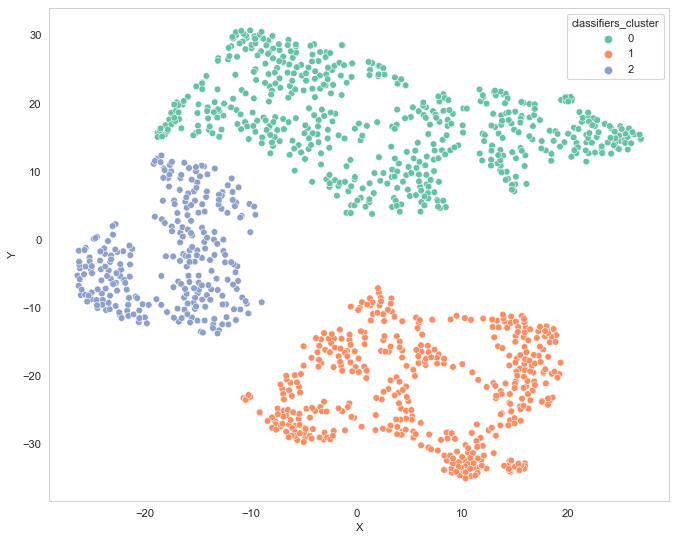

In [159]:
figure(figsize=(10, 8), dpi=80)
# plt.scatter(users_vectors[:, 0], users_vectors[:, 1], c='r', s=2)

# users_characteristics = pd.read_csv('users_characteristics.csv')
sns.scatterplot(data=users_characteristics, x='X', y='Y', hue='classifiers_cluster', palette='Set2')
plt.grid(False)
plt.show()

In [158]:
users_characteristics

,toxic_prediction,straw_man_pred,ad_hom_pred,vader_compound,vader_pos,vader_neu,vader_neg,roberta_pos,roberta_neg,roberta_neu,X,Y,cluster,tweets_cluster,user_id,classifiers_cluster
0,0.142857,0.500000,0.714286,-0.017639,0.047179,0.892679,0.060179,0.062916,0.349714,0.587370,-0.756473,7.118280,35,0,15628274,0
1,0.309038,0.818270,0.815355,-0.117335,0.069878,0.813653,0.116478,0.089039,0.531544,0.379417,-6.913095,26.089394,18,0,88865710,0
2,0.205479,0.726027,0.808219,-0.036775,0.077247,0.826247,0.096507,0.075588,0.492539,0.431873,-7.179299,22.322735,35,0,17887403,0
3,0.033333,0.222222,0.166667,-0.227838,0.067456,0.722222,0.210356,0.094183,0.280598,0.625219,24.977055,14.515505,35,2,79896423,0
4,0.117647,0.294118,0.176471,-0.298688,0.050412,0.679882,0.269765,0.064932,0.356135,0.578933,24.821575,15.302042,35,2,67735456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,0.000000,1.000000,1.000000,0.421500,0.149000,0.851000,0.000000,0.798617,0.003008,0.198375,-25.952662,-7.315881,21,1,35961145,2
1227,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.046417,0.265413,0.688169,18.111570,-23.276886,21,1,16688755,1
1228,0.000000,0.333333,0.333333,0.226667,0.097000,0.903000,0.000000,0.161675,0.027646,0.810679,4.662291,-27.862906,28,3,254909054,1
1229,0.000000,0.000000,1.000000,-0.950600,0.000000,0.502000,0.498000,0.010573,0.812164,0.177263,15.590939,20.232061,19,0,273897097,0


In [183]:
import itertools
clusters = list(cluster_characteristics['cluster'].unique())
combinations = list(itertools.combinations(clusters, 2))

alpha = 0.05

for combination in combinations:
    cl1, cl2 = combination
    group1 = users_characteristics.query('cluster == @cl1')['toxic_prediction'].values
    group2 = users_characteristics.query('cluster == @cl2')['toxic_prediction'].values
    result = stats.mannwhitneyu(group1, group2, alternative='two-sided')[1] >= alpha
    print(f'Clusters {cl1} and {cl2}')
    print('Mean value is the same' if result else 'Different mean values')
    print()

Clusters 35 and 18
Mean value is the same

Clusters 35 and 21
Mean value is the same

Clusters 35 and 28
Differen mean values

Clusters 35 and 6
Differen mean values

Clusters 35 and 19
Mean value is the same

Clusters 18 and 21
Differen mean values

Clusters 18 and 28
Differen mean values

Clusters 18 and 6
Differen mean values

Clusters 18 and 19
Mean value is the same

Clusters 21 and 28
Differen mean values

Clusters 21 and 6
Mean value is the same

Clusters 21 and 19
Differen mean values

Clusters 28 and 6
Differen mean values

Clusters 28 and 19
Differen mean values

Clusters 6 and 19
Differen mean values



In [195]:
cluster_characteristics[['cluster', 'toxic_prediction']]

,cluster,toxic_prediction
0,35,0.143468
1,18,0.199829
2,21,0.145315
3,28,0.131909
4,6,0.120542
5,19,0.196871


35, 21,

In [184]:
clusters = list(tweets_cluster_characteristics['tweets_cluster'].unique())
combinations = list(itertools.combinations(clusters, 2))

alpha = 0.05

for combination in combinations:
    cl1, cl2 = combination
    group1 = users_characteristics.query('tweets_cluster == @cl1')['toxic_prediction'].values
    group2 = users_characteristics.query('tweets_cluster == @cl2')['toxic_prediction'].values
    result = stats.mannwhitneyu(group1, group2, alternative='two-sided')[1] >= alpha
    print(f'Clusters {cl1} and {cl2}')
    print('Mean value is the same' if result else 'Differen mean values')
    print()

Clusters 0 and 2
Mean value is the same

Clusters 0 and 1
Differen mean values

Clusters 0 and 5
Differen mean values

Clusters 0 and 3
Differen mean values

Clusters 0 and 4
Differen mean values

Clusters 2 and 1
Differen mean values

Clusters 2 and 5
Differen mean values

Clusters 2 and 3
Differen mean values

Clusters 2 and 4
Differen mean values

Clusters 1 and 5
Mean value is the same

Clusters 1 and 3
Differen mean values

Clusters 1 and 4
Differen mean values

Clusters 5 and 3
Differen mean values

Clusters 5 and 4
Differen mean values

Clusters 3 and 4
Mean value is the same



In [197]:
tweets_cluster_characteristics[['tweets_cluster', 'toxic_prediction']]

,tweets_cluster,toxic_prediction
0,0,0.209837
1,2,0.193687
2,1,0.127488
3,5,0.116218
4,3,0.085890
5,4,0.147794


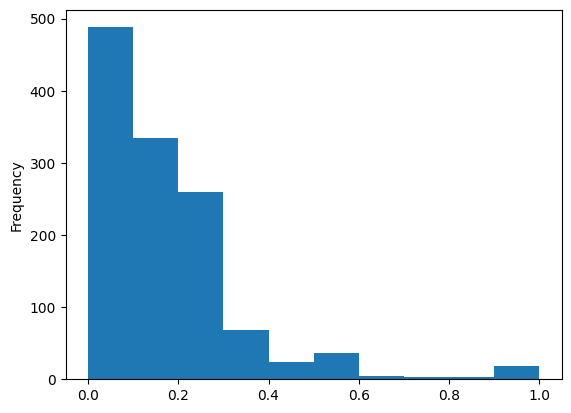

In [193]:
users_characteristics['toxic_prediction'].plot.hist(bins=10)
plt.savefig('toxicity.png')

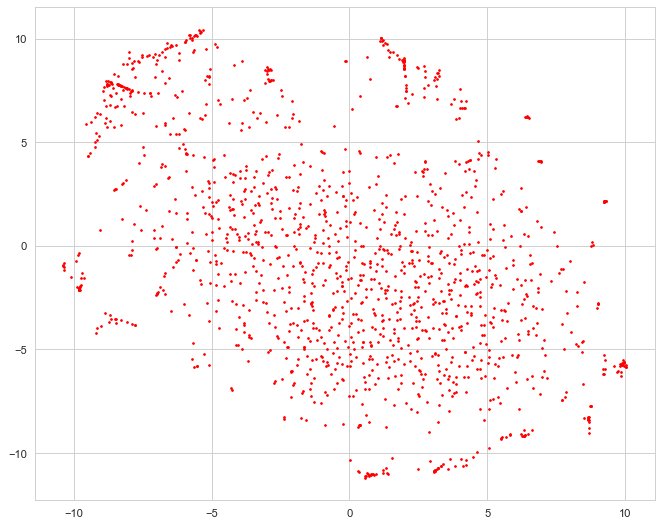

In [31]:
tsne = TSNE(n_components=2, perplexity=200)
tsne.fit(conv_characteristics.drop(columns=['conversation_id',
                                            'X',
                                            'Y']))
conv_vectors = tsne.embedding_
conv_characteristics['X'] = conv_vectors[:, 0]
conv_characteristics['Y'] = conv_vectors[:, 1]
figure(figsize=(10, 8), dpi=80)
plt.scatter(conv_characteristics['X'], conv_characteristics['Y'], c='r', s=2)
plt.show()